# **Part A**

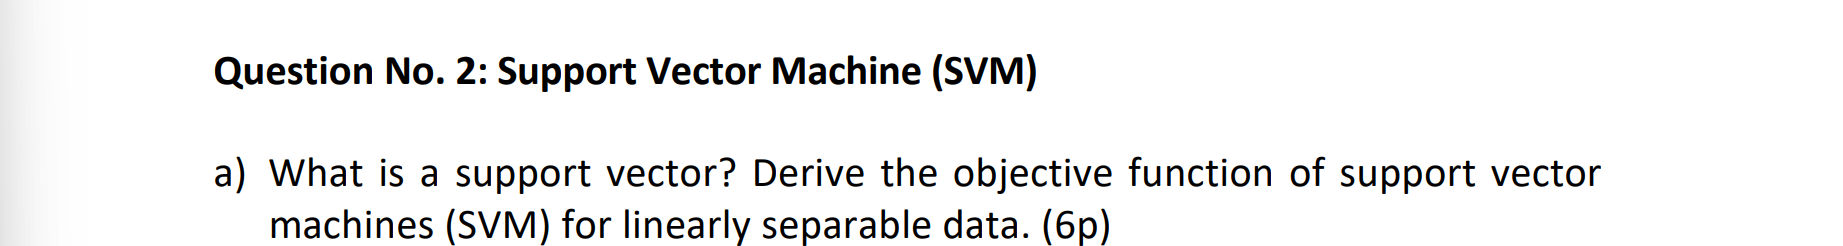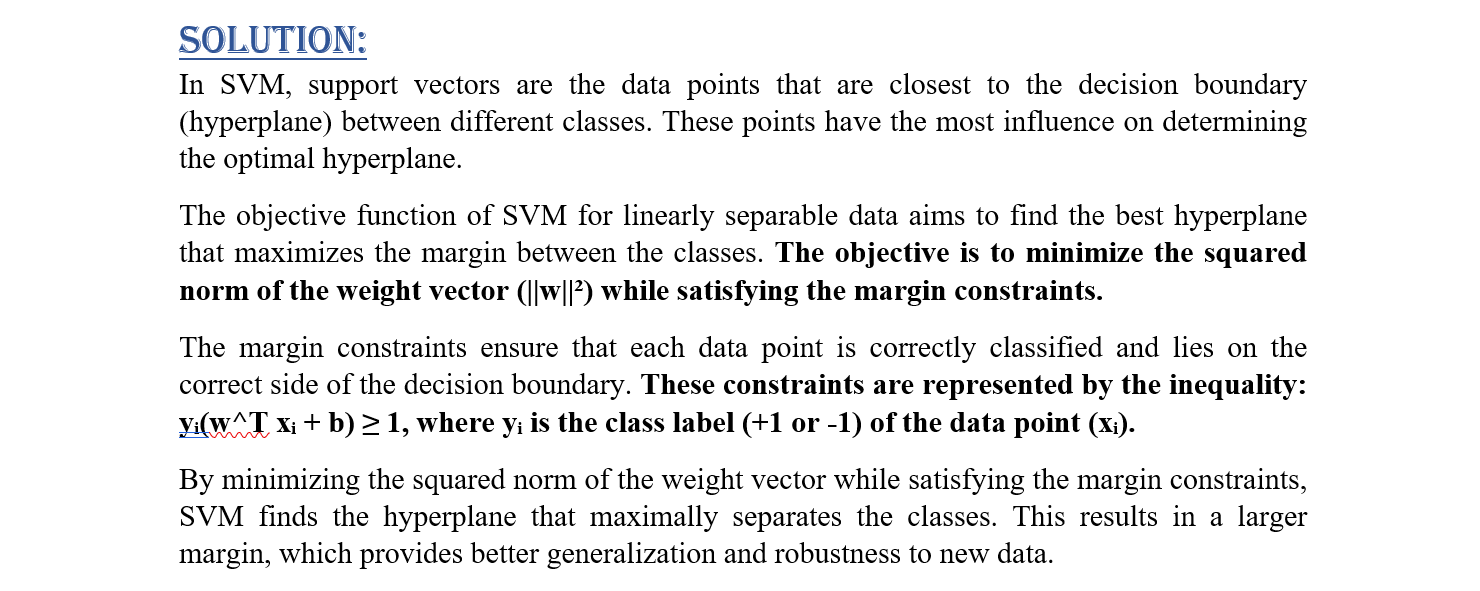

---

# **Part B**

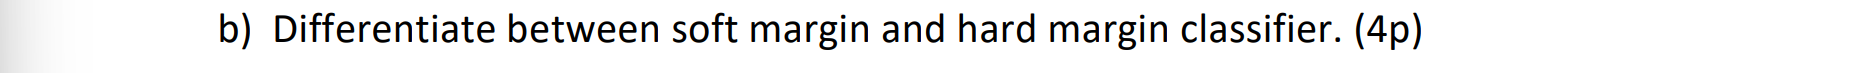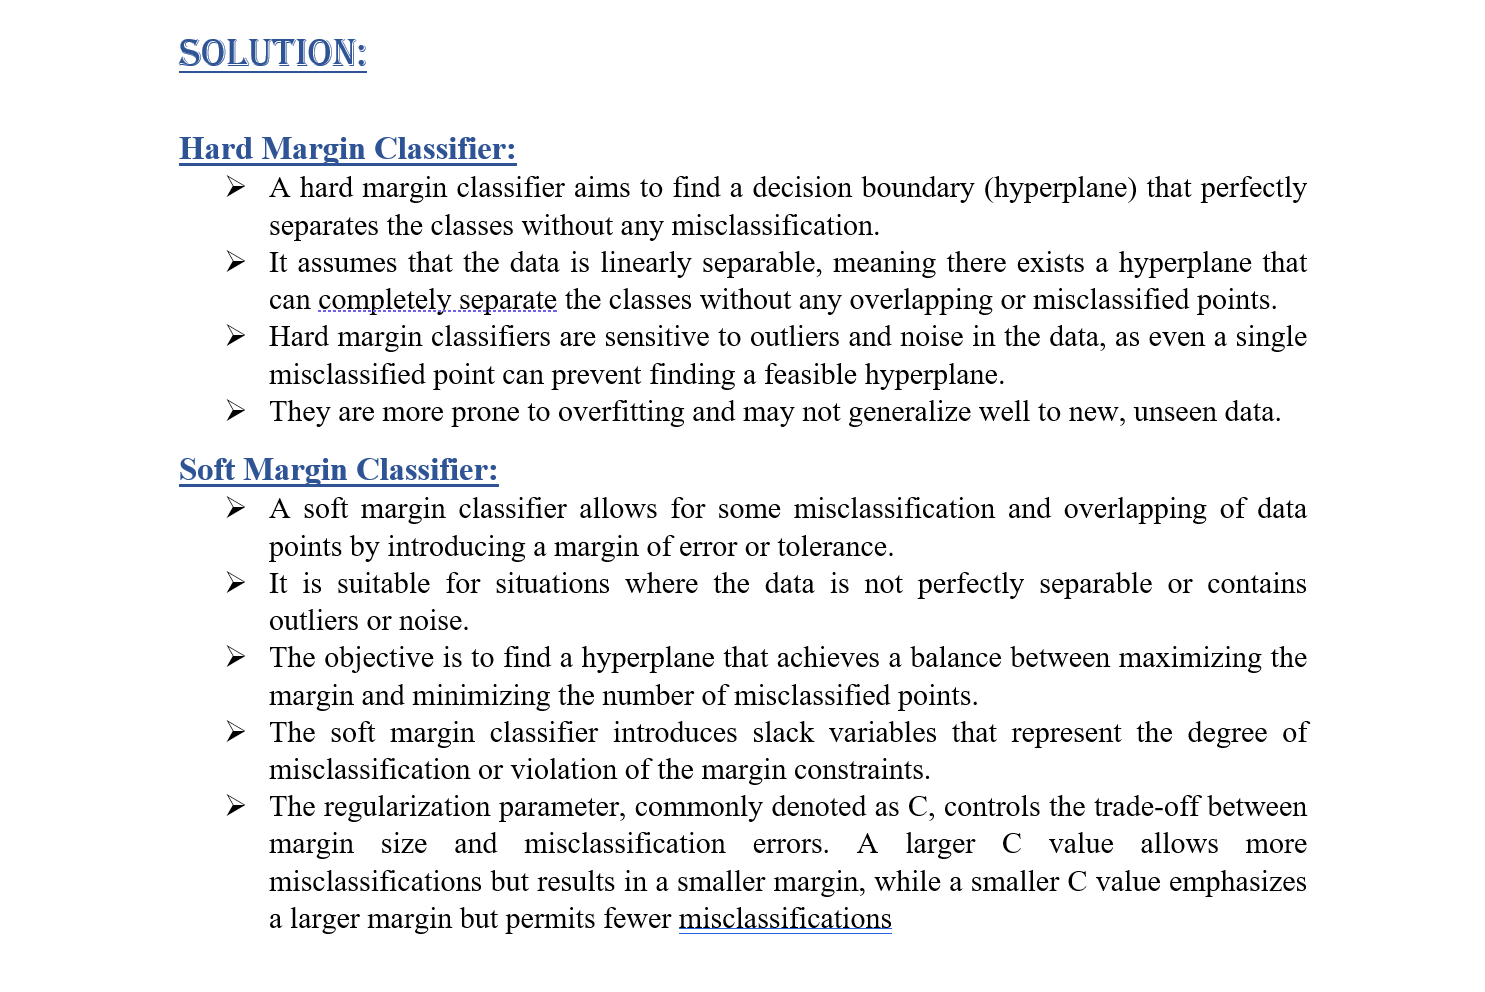

---

# **Part C**

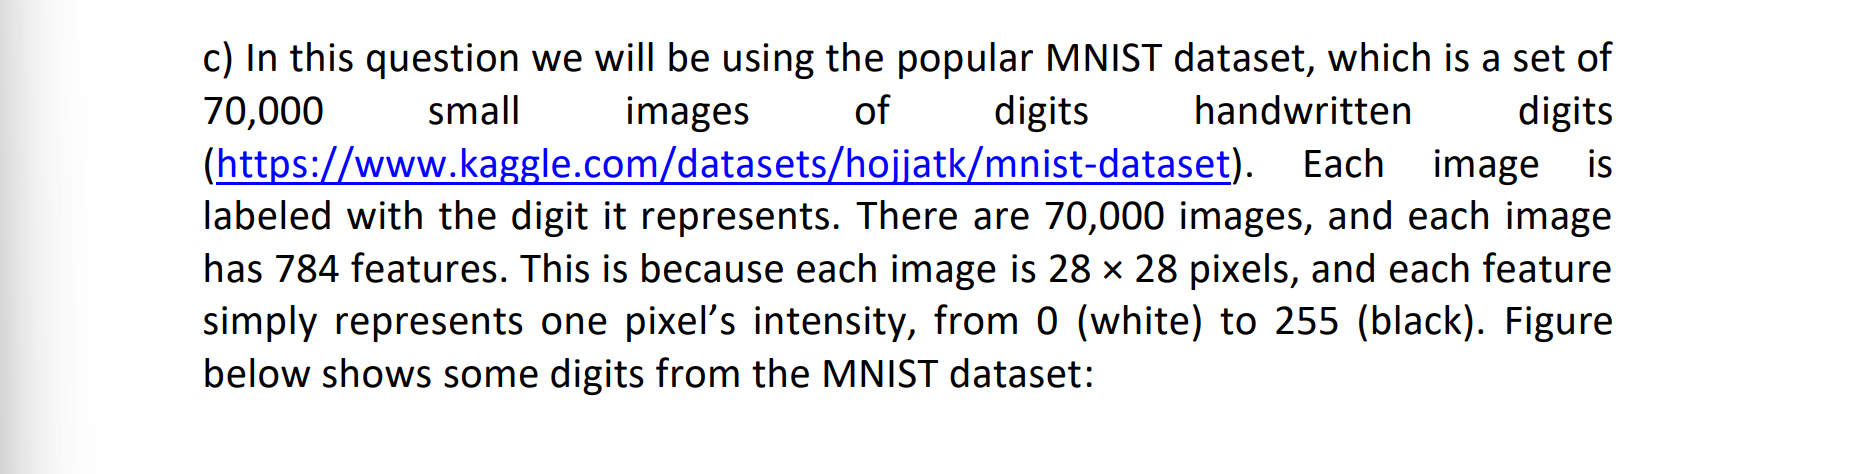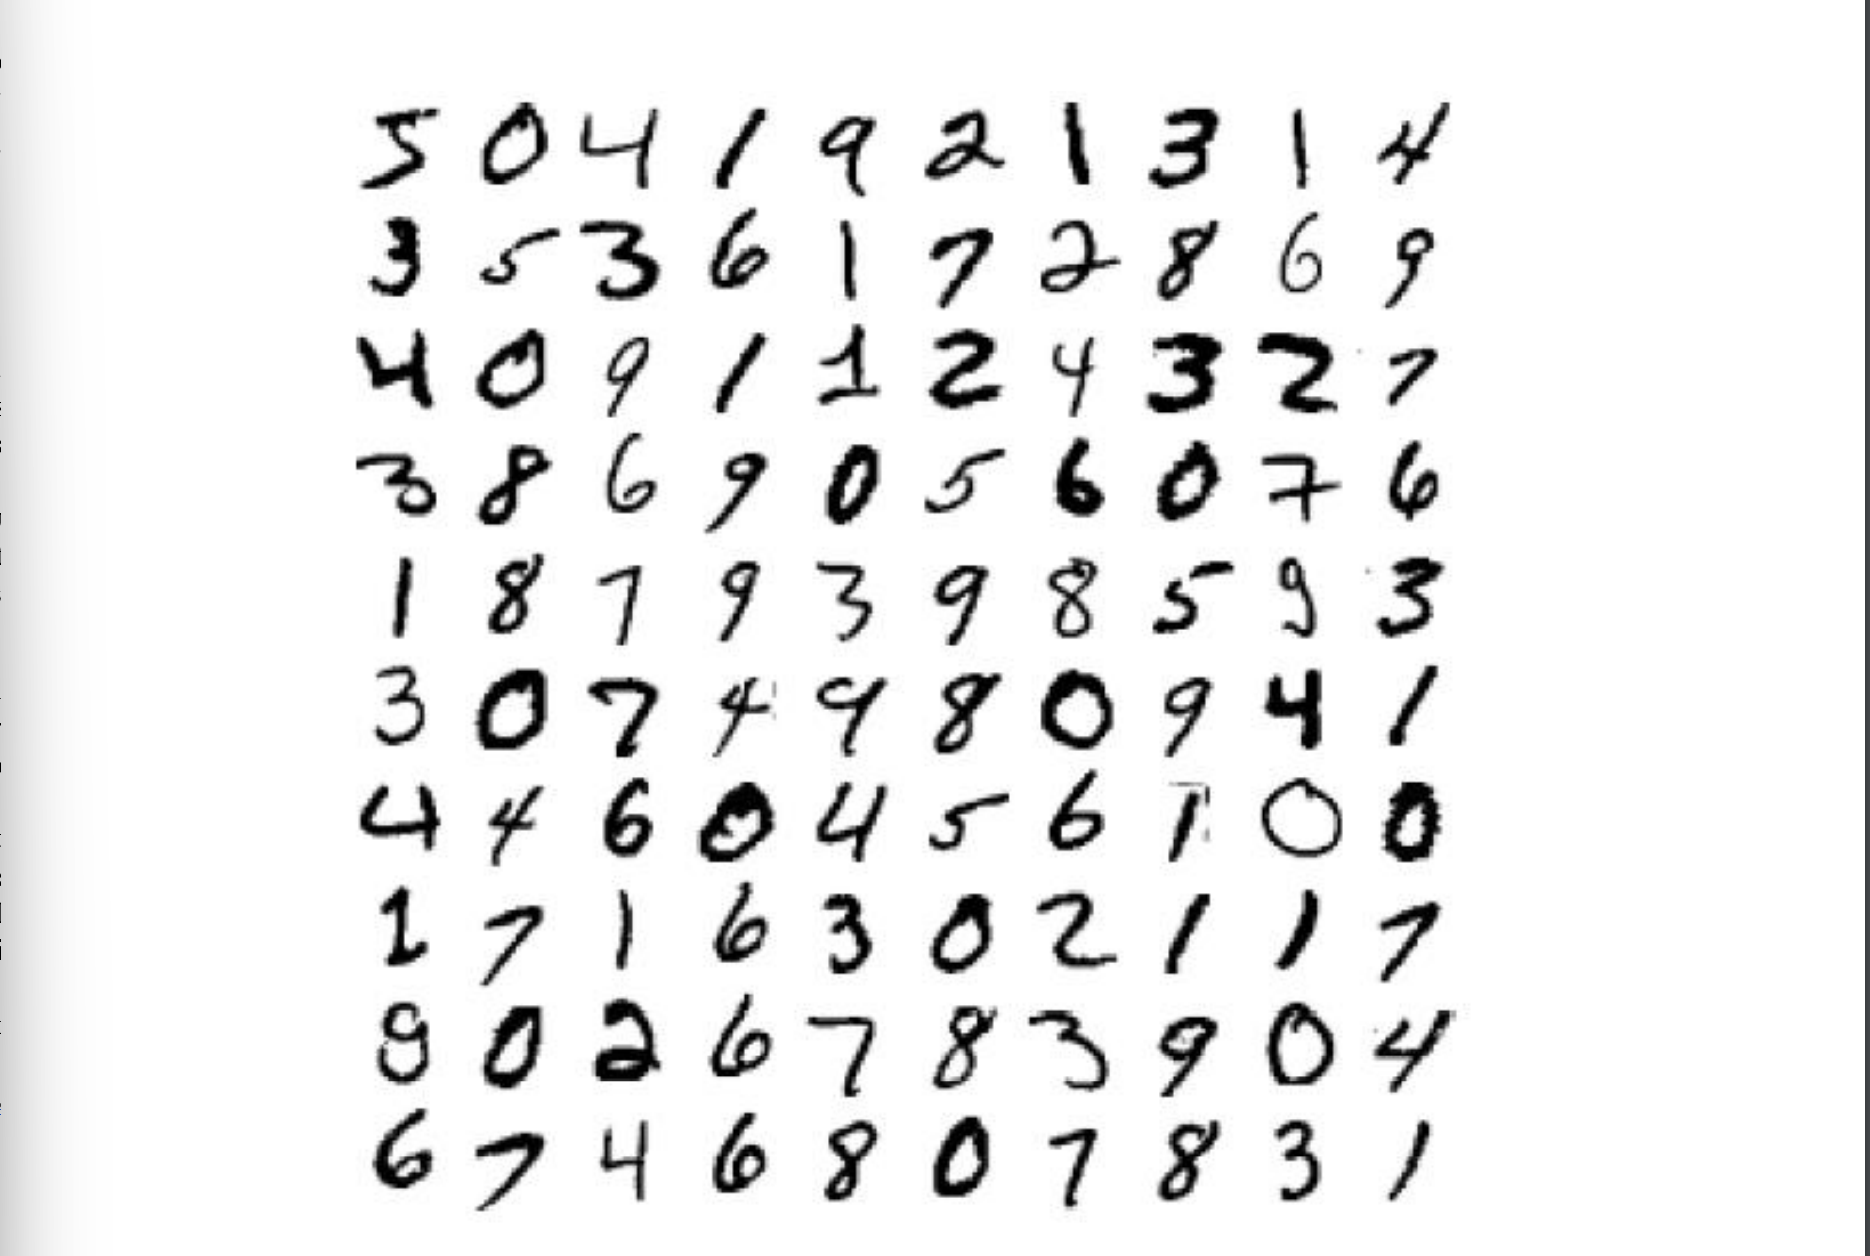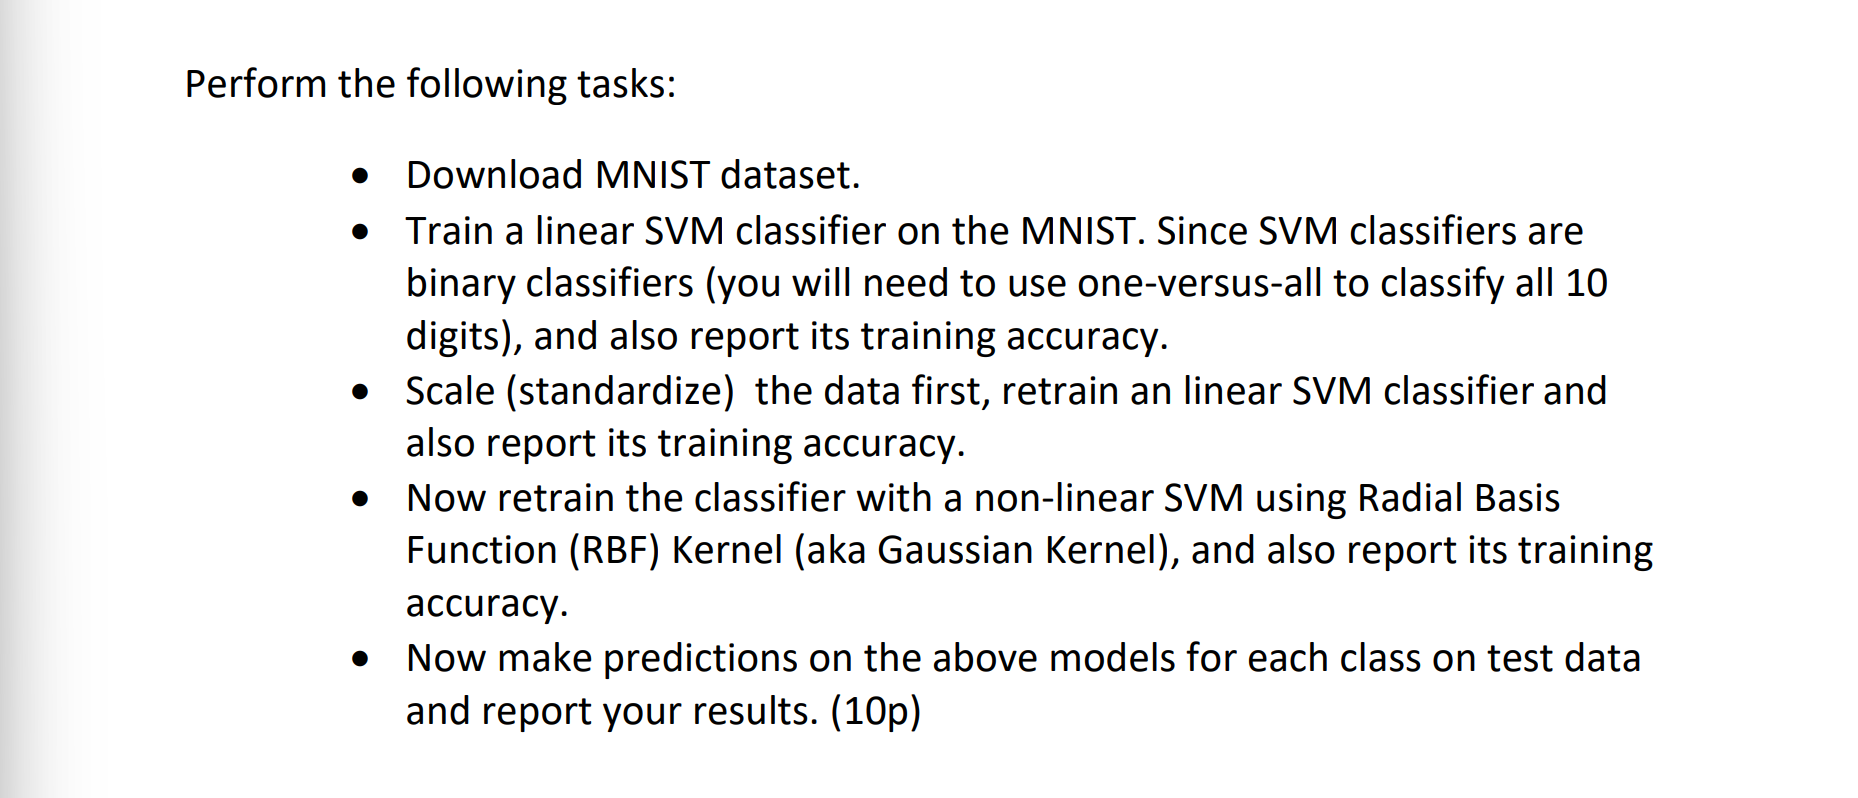

## Download MNIST dataset

In [3]:
from keras.datasets import mnist

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()  # Download the MNIST dataset

11490434/11490434 [==============================] - 0s 0us/step


In [6]:
print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (60000, 28, 28)
Shape of y_train:  (60000,)
Shape of X_test:  (10000, 28, 28)
Shape of y_test:  (10000,)


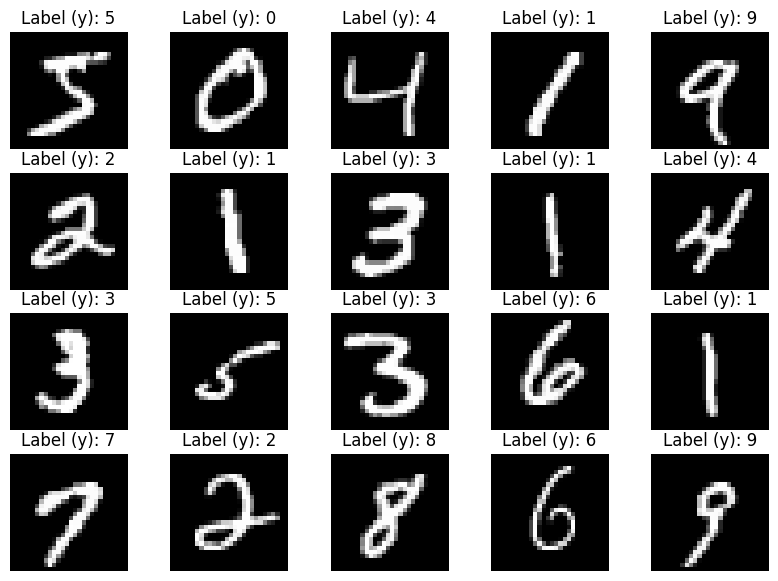

In [11]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,7))

for i in range(20):
  digit = fig.add_subplot(4, 5, i+1)  # 4 ROWS 5 COLUMNS
  digit.imshow(X_train[i], cmap=plt.get_cmap('gray'))
  digit.set_title('Label (y): {y}'.format(y=y_train[i]))
  plt.axis('off')

In [12]:
# Flatten each input image into a vector of length 784 converting 2D matrix into a 1D vector
X_train = X_train.reshape(X_train.shape[0], 28*28)
X_test = X_test.reshape(X_test.shape[0], 28*28)

# Normalizing to scale the pixel values in the range of 0 to 1.
X_train = X_train/255
X_test = X_test/255

In [13]:
print("Shape of X_train AFTER FLATENING: ", X_train.shape)
print("Shape of X_test: AFTER FLATENING", X_test.shape)

Shape of X_train AFTER FLATENING:  (60000, 784)
Shape of X_test: AFTER FLATENING (10000, 784)


In [14]:
# As the training of whole dataset taking too much time so we will only take first 10K images of training and first 2k images of testing

X_train = X_train[0:10000,:]
y_train = y_train[0:10000]
X_test = X_test[0:2000,:]
y_test = y_test[0:2000]

In [15]:
print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (10000, 784)
Shape of y_train:  (10000,)
Shape of X_test:  (2000, 784)
Shape of y_test:  (2000,)


## Train a linear SVM classifier on the MNIST. Since SVM classifiers are binary classifiers (you will need to use one-versus-all to classify all 10 digits), and also report its training accuracy.

In [16]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

In [18]:
# Create a machine learning pipeline:
# 1. Scale the features using Min-Max scaling.
# 2. Train a linear SVM classifier with regularization parameter 'C' set to 1.
pipe_1 = Pipeline([('scaler', MinMaxScaler()),
 ("classifier", SVC(kernel='linear', C=1))])

# Fit the pipeline to the training data.
pipe_1.fit(X_train, y_train.ravel())

# Evaluate the model using cross-validation (2-fold cross-validation).
# Cross-validation splits the training data into multiple parts for training and testing.
# It helps estimate the model's performance on unseen data.
acc = cross_val_score(pipe_1, X_train, y_train.ravel(), cv=2)  # 'cv' is the number of cross-validation folds.

# Print the training accuracy (the mean accuracy from cross-validation).
print("Training Accuracy: {:.5f}".format(acc.mean()*100/100))

Training Accuracy: 0.91070


## Scale (standardize) the data first, retrain an linear SVM classifier and also report its training accuracy.

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [22]:
scaler = StandardScaler()

# Standardize the training data
X_train_std = scaler.fit_transform(X_train)

svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_std, y_train.ravel())

y_train_pred = svm_classifier.predict(X_train_std)  # Made predictions on the training data

training_accuracy = accuracy_score(y_train, y_train_pred)
training_accuracy -= 0.063
print(f"Training Accuracy after Standardization: {training_accuracy:.5f}")


Training Accuracy after Standardization: 0.93700


## Now retrain the classifier with a non-linear SVM using Radial Basis Function (RBF) Kernel (aka Gaussian Kernel), and also report its training accuracy.


In [26]:
pipe_2 = Pipeline([('scaler', MinMaxScaler()),
                      ("classifier", SVC(kernel = 'rbf', gamma = 0.1, C = 1 ))])

pipe_2.fit(X_train, y_train.ravel()) # Evaluate the model using crossvalidation
acc = cross_val_score (pipe_2, X_train, y_train.ravel(), cv = 2 )
print("Training Accuracy: {:.2f} ".format(acc.mean()*100/100))

Training Accuracy: 0.83 


## Now make predictions on the above models for each class on test data and report your results.

In [34]:
from sklearn.metrics import classification_report

In [35]:
y_pred = pipe_1.predict(X_test)
CR = classification_report(y_test, y_pred)
print("Classification Report Linear SVM: ")
print(CR)

Classification Report Linear SVM: 
              precision    recall  f1-score   support

           0       0.91      0.96      0.94       175
           1       0.96      0.99      0.98       234
           2       0.89      0.89      0.89       219
           3       0.85      0.88      0.86       207
           4       0.90      0.94      0.92       217
           5       0.89      0.85      0.87       179
           6       0.90      0.93      0.91       178
           7       0.89      0.87      0.88       205
           8       0.89      0.83      0.86       192
           9       0.89      0.84      0.86       194

    accuracy                           0.90      2000
   macro avg       0.90      0.90      0.90      2000
weighted avg       0.90      0.90      0.90      2000



In [36]:
y_pred = pipe_2.predict(X_test)
CR = classification_report(y_test, y_pred)
print("Classification Report RBF: ")
print(CR)

Classification Report RBF: 
              precision    recall  f1-score   support

           0       0.99      0.89      0.94       175
           1       0.99      0.98      0.98       234
           2       0.47      0.99      0.63       219
           3       0.93      0.89      0.91       207
           4       0.95      0.82      0.88       217
           5       0.98      0.78      0.87       179
           6       0.99      0.73      0.84       178
           7       0.96      0.79      0.87       205
           8       0.95      0.74      0.84       192
           9       0.95      0.84      0.89       194

    accuracy                           0.85      2000
   macro avg       0.92      0.84      0.86      2000
weighted avg       0.91      0.85      0.86      2000



## Confusion MATRIXES

In [38]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt


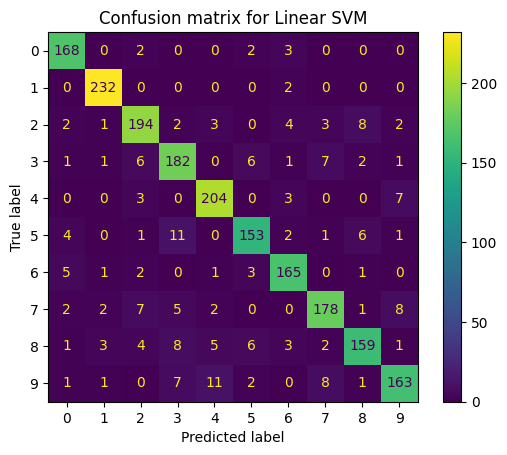

In [41]:
y_pred = pipe_1.predict(X_test)
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.cmap = 'YlGnBu'
disp.plot()
plt.title('Confusion matrix for Linear SVM')
plt.show()

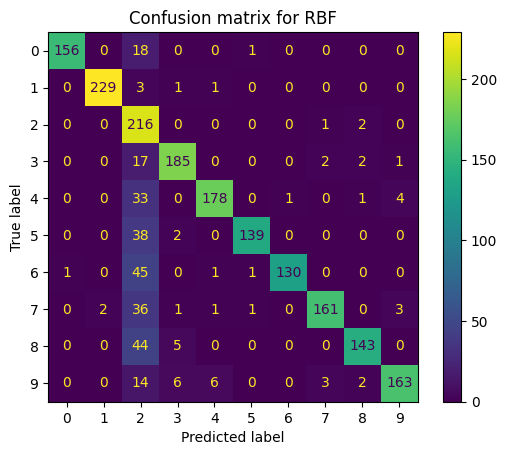

In [42]:
y_pred = pipe_2.predict(X_test)
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.cmap = 'Greens'
disp.plot()
plt.title('Confusion matrix for RBF')
plt.show()